In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel('ИЭФ.xls.xlsx')
df

,Unnamed: 0,Unnamed: 1,Pl-B,Spec,Exzam1,Exzam2,Exzam3,Exzam4,Exzam5,Exzam6,...,Exzam9,SummBall,NewVar5,Math,LangR,Foring,TestS,Z,TSumma,NewVar
0,1,NaN,0,эм,7,9,8,7,8,10,...,6.0,8.500,NaN,78,95,92,88.333333,6.736260,265,5.579730
1,2,NaN,0,эм,6,9,10,6,10,8,...,9.0,8.500,NaN,80,94,92,88.666667,6.754104,266,5.583496
2,3,NaN,1,эм,5,6,7,7,9,9,...,5.0,7.250,NaN,42,60,96,66.000000,5.540685,198,5.288267
3,4,NaN,1,эм,4,4,4,5,4,4,...,6.0,4.125,NaN,30,51,47,42.666667,4.291577,128,4.852030
4,5,NaN,0,эм,6,8,9,8,9,8,...,9.0,7.750,NaN,67,91,96,84.666667,6.539971,254,5.537334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,NaN,0,ИСИТвЛ,5,8,8,7,7,9,...,NaN,7.250,NaN,91,78,83,84.000000,6.504283,252,5.529429
226,227,NaN,1,ИСИТвЛ,6,4,7,6,4,4,...,NaN,5.125,NaN,45,32,51,42.666667,4.291577,128,4.852030
227,228,NaN,0,ИСИТвЛ,5,5,4,6,7,6,...,NaN,5.375,NaN,96,81,67,81.333333,6.361527,244,5.497168
228,229,NaN,0,ИСИТвЛ,5,6,7,7,9,6,...,NaN,6.750,NaN,82,67,95,81.333333,6.361527,244,5.497168


In [ ]:
X = df[['Exzam1', 'Exzam2', 'Exzam3', 'Exzam4', 'Exzam5']]
X.head()

,Exzam1,Exzam2,Exzam3,Exzam4,Exzam5
0,7,9,8,7,8
1,6,9,10,6,10
2,5,6,7,7,9
3,4,4,4,5,4
4,6,8,9,8,9


In [ ]:
standardized_df = (X - X.mean()) / X.std()

In [ ]:
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(standardized_df)

In [ ]:
tsne_results_df = pd.DataFrame(X_embedded, columns=['tsne_component_1', 'tsne_component_2'])
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(tsne_results_df)
cluster_labels = kmeans_model.predict(tsne_results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


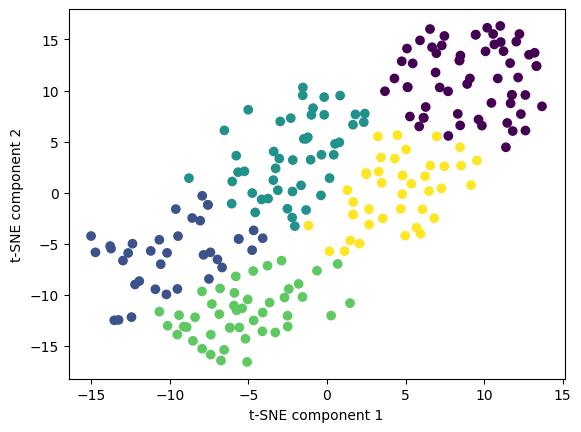

In [ ]:
tsne_components = tsne_results_df[['tsne_component_1', 'tsne_component_2']].to_numpy()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=cluster_labels)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()